In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('spy_tlt_gld.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)
data.set_index('Date', inplace=True)

data.drop({'GLD'}, axis=1, inplace=True)


In [2]:
data.head()

,SPY,TLT
Date,,
2007-01-03,106.930310,57.971245
2007-01-04,107.157234,58.322742
2007-01-05,106.302510,58.075394
2007-01-08,106.794174,58.173035
2007-01-09,106.703410,58.173035


In [3]:
roll_days = 22

data_pct = data.pct_change(roll_days)
data_pct.dropna(how='any', inplace=True)


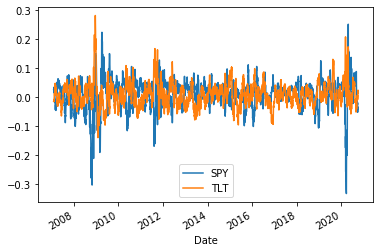

In [4]:
data_pct.plot()

### How Often does SPY "Win" or "Lose" over a roll_days period

In [13]:
# How often does SPY "win" over 1 month timeframe
spy_win = data_pct['SPY'][data_pct['SPY'] >= 0]
spy_win_freq = len(spy_win) / len(data_pct)

# How often does SPY "lose" over 1 month timeframe
spy_loss = data_pct['SPY'][data_pct['SPY'] < 0]
spy_loss_freq = len(spy_loss) / len(data_pct)

spy_win_freq, spy_loss_freq

(0.6670543762721721, 0.3329456237278279)

### When SPY "Wins", how much does it "Win". Same for Losses

In [14]:
# When SPY "wins" we make (spy_win_eval - 1)%
spy_win_eval = stats.gmean(spy_win + 1)

# When SPY "loses" we make (spy_loss_eval - 1)% 
spy_loss_eval = stats.gmean(spy_loss + 1)

spy_win_eval, spy_loss_eval

(1.034116886634668, 0.9556288320259089)

### How Often does TLT "Win" or "Lose" over a roll_days period

In [15]:
# How often does TLT "win" over 1 month timeframe
tlt_win = data_pct['TLT'][data_pct['TLT'] >= 0]

# How often does TLT "lose" over a 1 month timeframe
tlt_loss = data_pct['TLT'][data_pct['TLT'] < 0]

(len(tlt_win) / len(data_pct)), (len(tlt_loss) / len(data_pct))

(0.5644082582145973, 0.4355917417854027)

### When TLT "Wins", how much does it "Win". Same for Losses

In [16]:
# When TLT "wins" we make (tlt_win_eval - 1)%
tlt_win_eval = stats.gmean(tlt_win + 1)

# When TLT "loses" we make (tlt_loss_eval - 1)% 
tlt_loss_eval = stats.gmean(tlt_loss + 1)

tlt_win_eval, tlt_loss_eval

(1.033310140844369, 0.9733377056151096)

### What is the expected roll_days value of holding SPY & TLT (individually)

In [22]:
spy_total_eval = stats.gmean(data_pct['SPY'] + 1)
tlt_total_eval = stats.gmean(data_pct['TLT'] + 1)

spy_total_eval, tlt_total_eval

(1.0072937182701633, 1.0067453169548506)

### How many of the winning months for SPY Overlap with the winning months for TLT

In [34]:
# stocks and bonds both up
both_win = len(data_pct.loc[(data_pct['SPY'] >=0) & (data_pct['TLT'] >=0)]) / len(data_pct)

# stocks and bonds both down
both_lose = len(data_pct.loc[(data_pct['SPY'] < 0) & (data_pct['TLT'] < 0)]) / len(data_pct)

# stocks up, bonds down
su_bd = len(data_pct.loc[(data_pct['SPY'] >= 0) & (data_pct['TLT'] < 0)]) / len(data_pct)

# stocks down, bonds up
sd_bu = len(data_pct.loc[(data_pct['SPY'] < 0) & (data_pct['TLT'] >= 0)]) / len(data_pct)

# stocks and bonds move the opposite direction
different = 1 - (both_win + both_lose)

both_win, both_lose, different
su_bd, sd_bu

(0.3431230008723466, 0.24047688281477173)

### Plotting the Correlation

In [51]:
short_corr = data_pct['SPY'].rolling(roll_days).corr(data_pct['TLT'])
med_corr = data_pct['SPY'].rolling(roll_days*3).corr(data_pct['TLT'])
base_corr = data_pct['SPY'].rolling(252).corr(data_pct['TLT'])

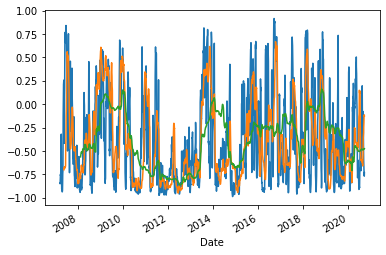

In [53]:
short_corr.plot()
med_corr.plot()
base_corr.plot()